# Lending Club Default Analysis

The data analysis consists four main parts:
 #### I. Data understanding 
 #### II. Data cleaning (cleaning missing values, removing duplicate columns and so)
 #### III. Data Analysis 
 #### IV. Recommendations

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("loan.csv", sep=",")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## I. Data understanding 

In [259]:
print(loan.info(),'\n')
print(loan.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None 

(39717, 111)


In [260]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [261]:
#print(loan.isnull().sum())

#percentage of missing values for each column and sort by missing percentage
round(loan.isnull().sum()/len(loan.index), 2).sort_values(ascending=True)[:]*100
round(loan.isnull().sum()/len(loan.index), 2).sort_values(ascending=True)[:60]*100

id                              0.0
pub_rec                         0.0
revol_bal                       0.0
revol_util                      0.0
total_acc                       0.0
initial_list_status             0.0
out_prncp                       0.0
out_prncp_inv                   0.0
total_pymnt                     0.0
total_pymnt_inv                 0.0
total_rec_int                   0.0
total_rec_late_fee              0.0
recoveries                      0.0
collection_recovery_fee         0.0
last_pymnt_d                    0.0
last_pymnt_amnt                 0.0
last_credit_pull_d              0.0
collections_12_mths_ex_med      0.0
policy_code                     0.0
application_type                0.0
tax_liens                       0.0
acc_now_delinq                  0.0
chargeoff_within_12_mths        0.0
delinq_amnt                     0.0
open_acc                        0.0
inq_last_6mths                  0.0
total_rec_prncp                 0.0
delinq_2yrs                 

## II. Data cleaning 

In [262]:
# removing the columns having more than 90% missing values which won't give more insights as they have less amount of data.

missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(len(missing_columns), '\n')
print(missing_columns)

56 

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24

In [263]:
#drop the columns which has more than 90% missing values 

loan = loan.drop(missing_columns, axis=1)

In [264]:
#verify the columns in data frame
print(loan.shape)

(39717, 55)


In [265]:
#check the missing column percentages in loan data frame
(loan.isnull().sum()/len(loan.index)).sort_values(ascending=False)*100

mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
term                           0.000000
loan_status                    0.000000
purpose                        0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
url                            0.000000
pymnt_plan                     0.000000
funded_amnt_inv                0.000000
issue_d                        0.000000
int_rate                       0.000000
verification_status            0.000000
annual_inc                     0.000000


In [266]:
# observe the 'mths_since_last_delinq' & 'desc' variables data in loan data frame
loan.loc[:,['mths_since_last_delinq','desc']].head(10)

,mths_since_last_delinq,desc
0,NaN,Borrower added on 12/22/11 > I need to upgra...
1,NaN,Borrower added on 12/22/11 > I plan to use t...
2,NaN,NaN
3,35.0,Borrower added on 12/21/11 > to pay for prop...
4,38.0,Borrower added on 12/21/11 > I plan on combi...
5,NaN,NaN
6,NaN,Borrower added on 12/18/11 > I am planning o...
7,NaN,Borrower added on 12/16/11 > Downpayment for...
8,NaN,Borrower added on 12/21/11 > I own a small h...
9,NaN,Borrower added on 12/16/11 > I'm trying to b...


In [267]:
# dropping the two columns as these won't help us in target variable which is loan status.
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [268]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [269]:
loan.shape

(39717, 53)

In [270]:
# check the missing values percentages for each row.
loan.isnull().sum(axis=1).sort_values(ascending=False)[:20]

39714    5
39715    5
39659    5
39660    5
39706    5
39704    5
39700    5
39716    4
39686    4
39691    4
39690    4
39689    4
39688    4
39687    4
39674    4
39685    4
39682    4
39693    4
39672    4
39671    4
dtype: int64

In [271]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [272]:
# by above observation, 'int_rate' column is character type but we need it in integer or float. we will prefer float as we need decimal
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [273]:
# verify the data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [274]:
loan.head()
#as per the given 'data_dictionary', emp_length	Employment length in years.
# and possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
loan.loc[:,['emp_length']].head(10)

,emp_length
0,10+ years
1,< 1 year
2,10+ years
3,10+ years
4,1 year
5,3 years
6,8 years
7,9 years
8,4 years
9,< 1 year


In [275]:
# using regular expression to extract employment length which means numeric values from the string

loan = loan[~loan['emp_length'].isnull()]
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

## III. Data Analysis

understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 

Now, there are broadly three types of variables -
1. The applicants (demographic variables such as age, occupation, employment details etc.),

2. loan characteristics (amount of loan, interest rate, purpose of loan etc.)

3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, next payment date & so on).

Now, the applicant behaviour variables are not available at the time of loan application which wont help us in prediction for credit approval. 

So we will use only the loan characteristics and Customer behaviour variables for further data analysis






1. purpose	variable is category provided by the borrower for the loan request. and the title is The loan title provided by the borrower. 
    by the above observation & data, 'title' variable is derived from 'purpose' variable.
    
2. we won't be able to use the variables url, zip code, address, state etc

In [276]:
# observe the title and purpose varaibles.
# with data, 'title' variable is derived from or subset of 'purpose' variable.
loan.loc[:,['title','purpose']].head(50)

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
4,Personal,other
5,My wedding loan I promise to pay back,wedding
6,Loan,debt_consolidation
7,Car Downpayment,car
8,Expand Business & Buy Debt Portfolio,small_business
9,Building my credit history.,other


In [277]:
#  we don't to use the variables url, zip code, address, state for credit approval process
loan = loan.drop(['title', 'zip_code', 'url' , 'addr_state'], axis=1)

In [278]:
# ide

loan.head()
var_behaviour = ["application_type",
"delinq_2yrs",
"earliest_cr_line",
"collection_recovery_fee",
"inq_last_6mths",
"last_credit_pull_d", 
"last_pymnt_d",
"last_pymnt_amnt",
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"open_acc",
"total_acc",
"pub_rec",
"revol_bal",
"revol_util",
"inq_last_6mths",
"recoveries"]

In [279]:
print(var_behaviour)

# lets delete the behaviour variables from loan data frame as they cannot be used as predictors for credit approval.
loan = loan.drop(var_behaviour, axis=1)

loan.info()

['application_type', 'delinq_2yrs', 'earliest_cr_line', 'collection_recovery_fee', 'inq_last_6mths', 'last_credit_pull_d', 'last_pymnt_d', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'open_acc', 'total_acc', 'pub_rec', 'revol_bal', 'revol_util', 'inq_last_6mths', 'recoveries']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 30 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                  

Now look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise to achieve our analysis.

In [280]:
# lets find the loan_status variable statistics
loan['loan_status'] = loan['loan_status'].astype('category')
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [281]:
#np.mean(loan['loan_status'])

In [282]:
# filtering only fully paid or charged-off as we dont need the loan records which has Current as status
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [283]:
# converting loan_status to integer type to know overall default rate percentage in better way
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

In [284]:
# check the loan status variable counts
loan['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

## III. Univariate Analysis

let's find out the the overall default rate.

In [285]:
# default rate percenatage with mean of loan status

np.mean(loan['loan_status'])

0.14380460259961644

the overall loan default rate is 14 %

#### Let's first visualise the average default rates across categorical variables.

In [286]:
# lets generic a function to plot loan_status across all categorical variables (purpose, term, grade, -
# sub grade, verification status)

def plot_cat(cat_var):
    plt.figure(figsize=(20, 6))
    sns.barplot(x=cat_var, y='loan_status', data=loan)
    plt.show()

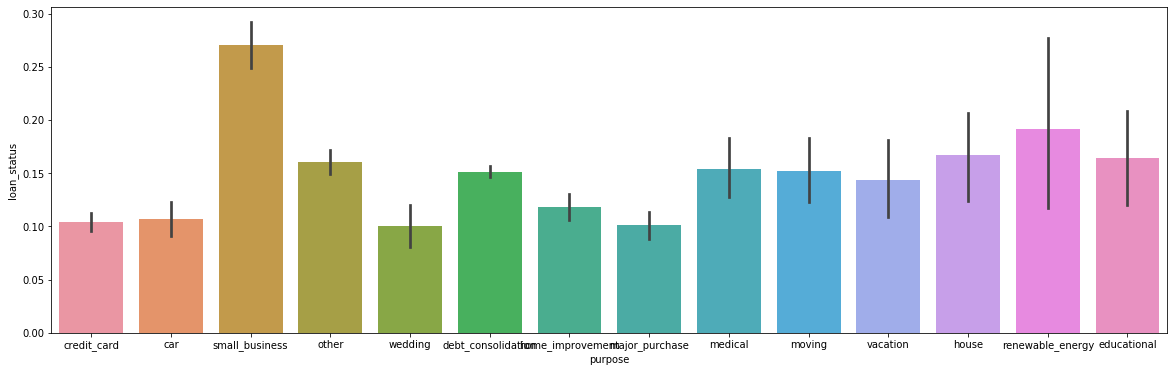

In [287]:
# plot the graph for default rates across purpose of loan

plot_cat('purpose')

``observation`` : small business loans default the most, then renewable energy, education and houses

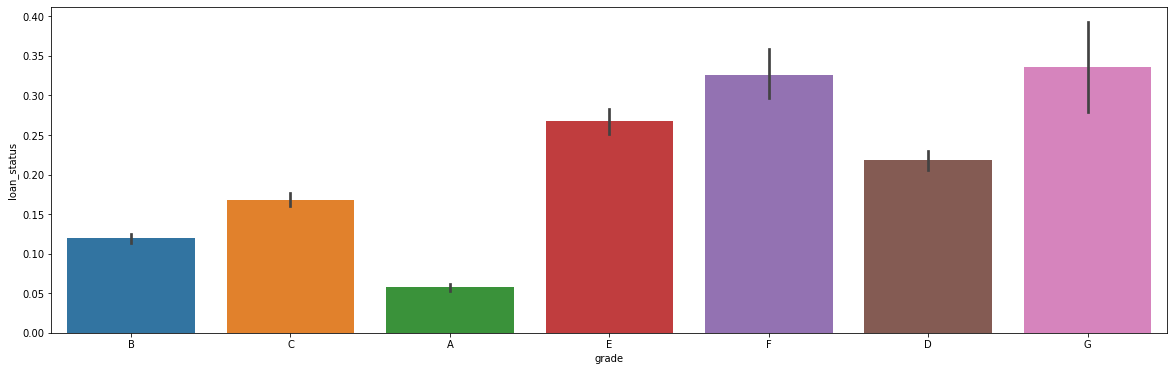

In [288]:
# plot the graph for default rates across grade of loan

plot_cat('grade')

``observation`` : from A to G, the default rate increases which is expected because the grade is decided by Lending Club based on the risk undertaking of the loan. 


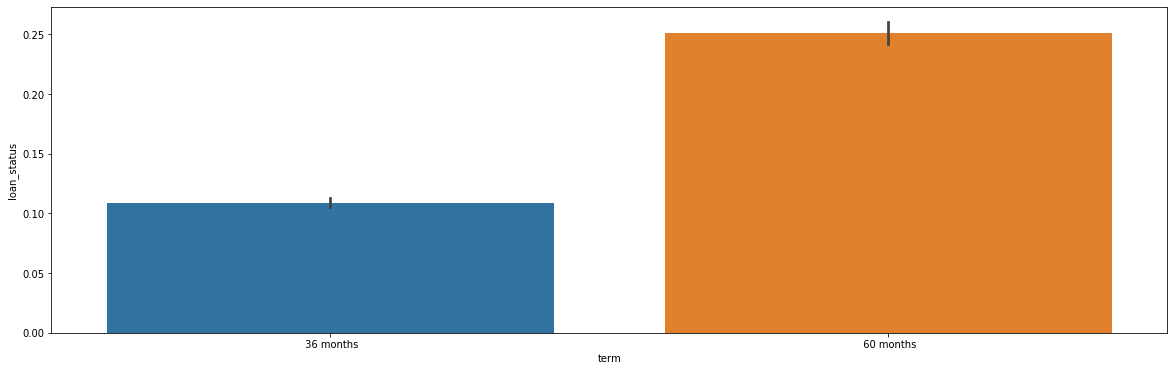

In [289]:
# plot the graph for default rates across term of loan

plot_cat('term')

``observation`` : 60 months loans default more than 36 months loans

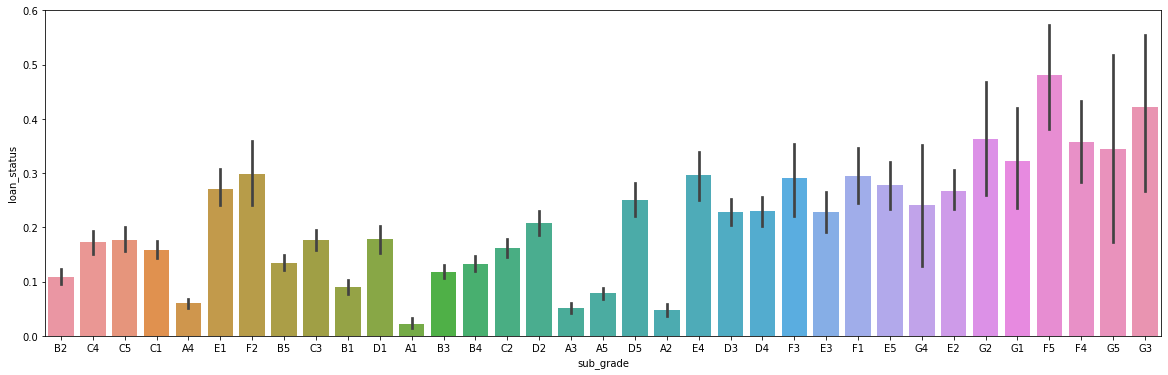

In [290]:
# plot the graph for default rates across sub-grade of loan

plot_cat('sub_grade')

``observation`` : A1 is better than A2 better than A3 and so on in ascending manner .It got varied in F4 & F5 which highest and more than G5 & G3.

and Median is F5 sub-grade

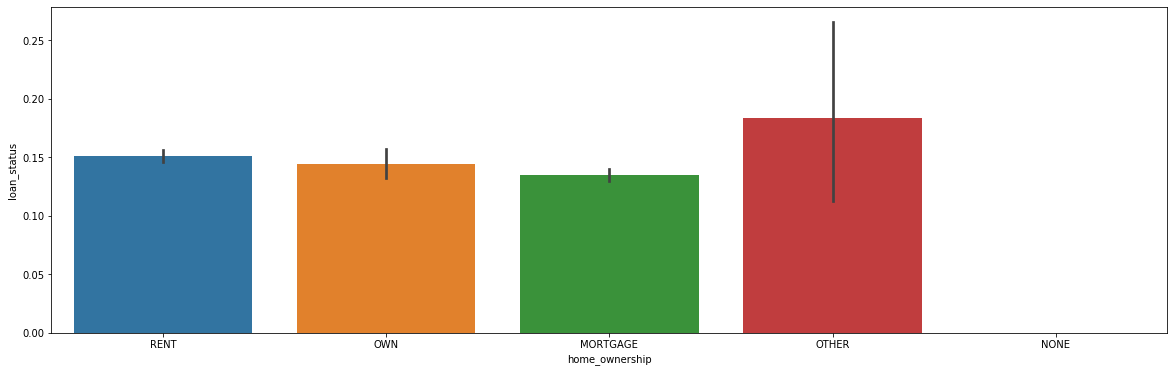

In [291]:
# plot the graph for default rates across sub-grade of loan

plot_cat('home_ownership')

``observation`` : All catergories results in same range except OTHER and looks like this is not a great discriminator.

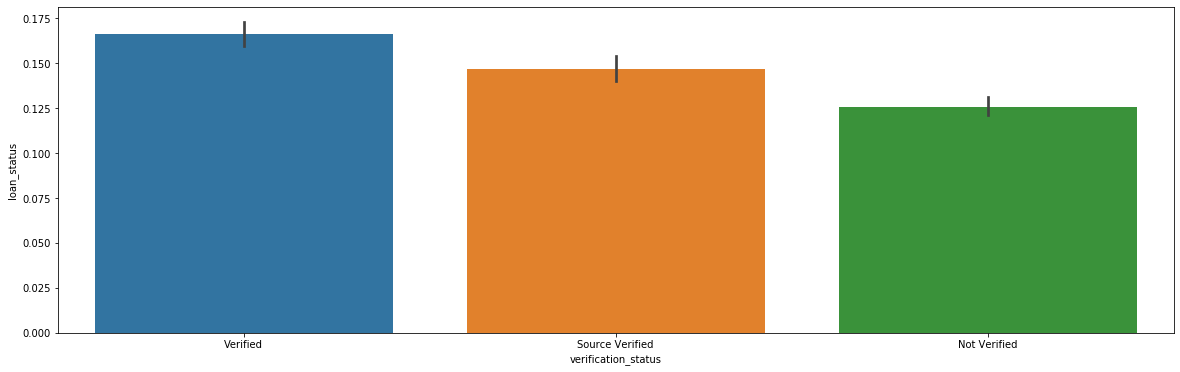

In [292]:
# verification_status:

plot_cat('verification_status')

``observations`` : verified loans default more than which are not verified.

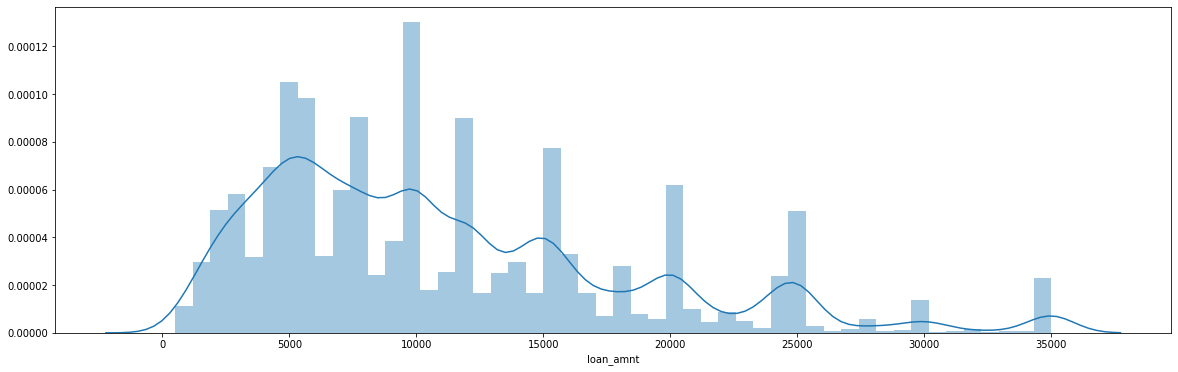

In [293]:
# loan amount: 

plt.figure(figsize=(20, 6))
sns.distplot(loan['loan_amnt'])
plt.show()

``observations``: the median loan amount is around 10,000

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.


lets make the loan amount variable into small, medium, high, very high for better understanding with some defined ranges

In [294]:
# lets do binning/ categorizing for loan amount
def loan_amount(n):
    if(n<5000):
        return 'low'
    elif(n>=5000 and n<15000):
        return 'medium'
    elif(n>=15000 and n<25000):
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))

In [295]:
#find all counts for loan_amount category_wise
loan['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

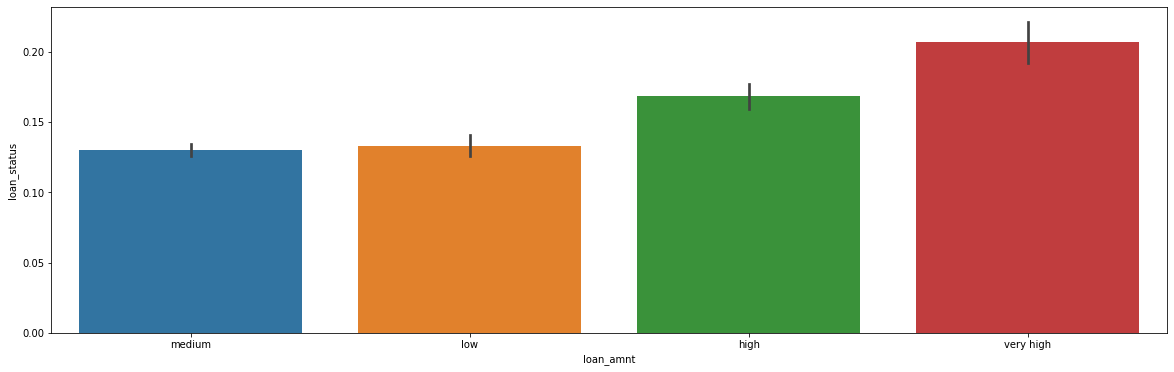

In [296]:
# plot the graph with default rates across loan amount type
plot_cat('loan_amnt')

``observations``: higher the loan amount, higher the default rate

In [297]:
# observe convert funded amount invested to bins
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda x: loan_amount(x))

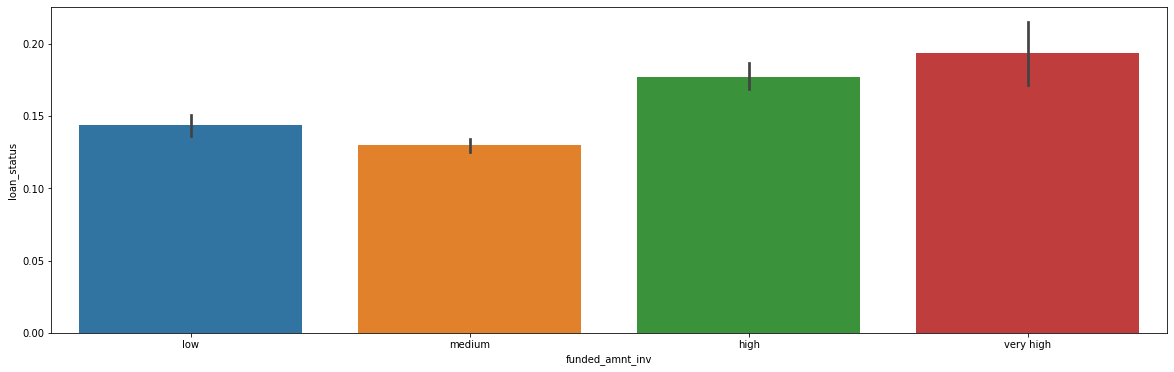

In [298]:
# funded amount invested
plot_cat('funded_amnt_inv')

In [299]:
# observe interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n>10 and n<=15:
        return 'medium'
    else:
        return 'high'

In [300]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))

In [301]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'

In [302]:
loan['funded_amnt'] = loan['funded_amnt'].apply(lambda x: funded_amount(x))

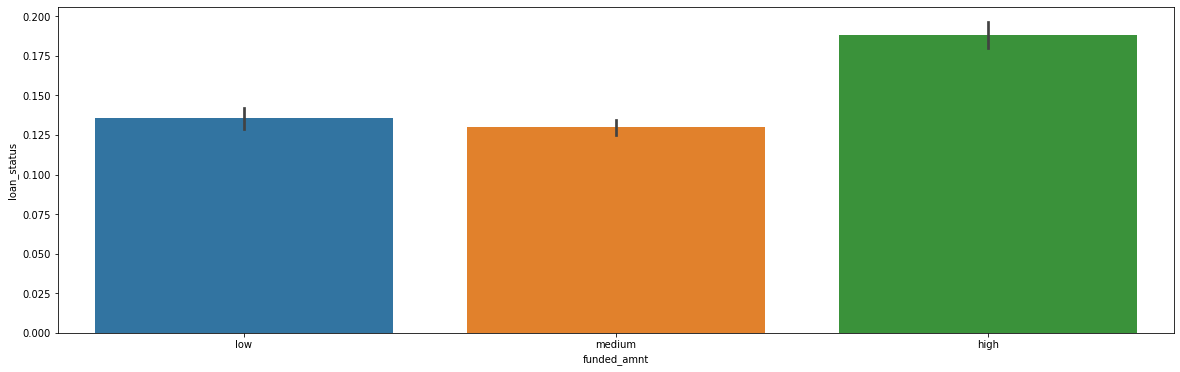

In [303]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate

plot_cat('funded_amnt')

In [304]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

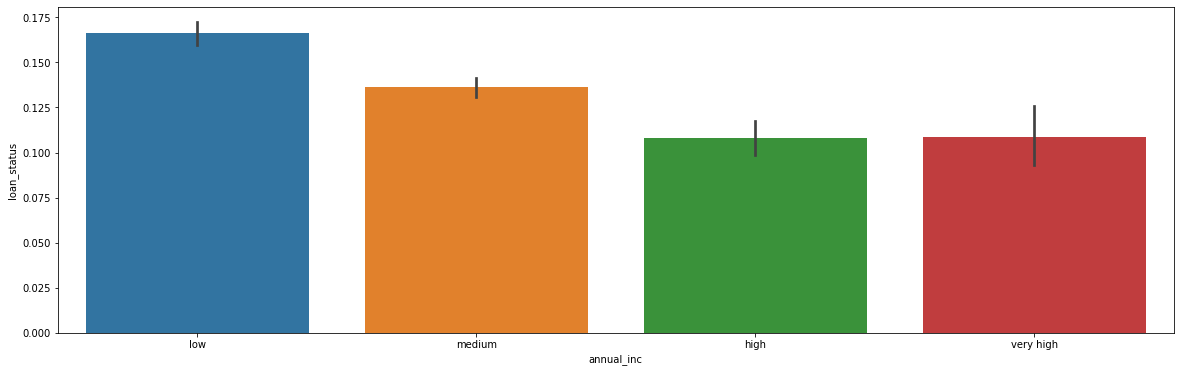

In [305]:
# annual income and default rate
# lower the annual income, higher the default rate

plot_cat('annual_inc')

In [306]:
# employment length
# first, let's drop the missing value observations in emp length
loan = loan[~loan['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan['emp_length'] = loan['emp_length'].apply(lambda x: emp_length(x))

In [307]:
# observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it.
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [308]:
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [309]:
# let's first observe the number of loans granted across years
loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

<Figure size 1440x432 with 0 Axes>

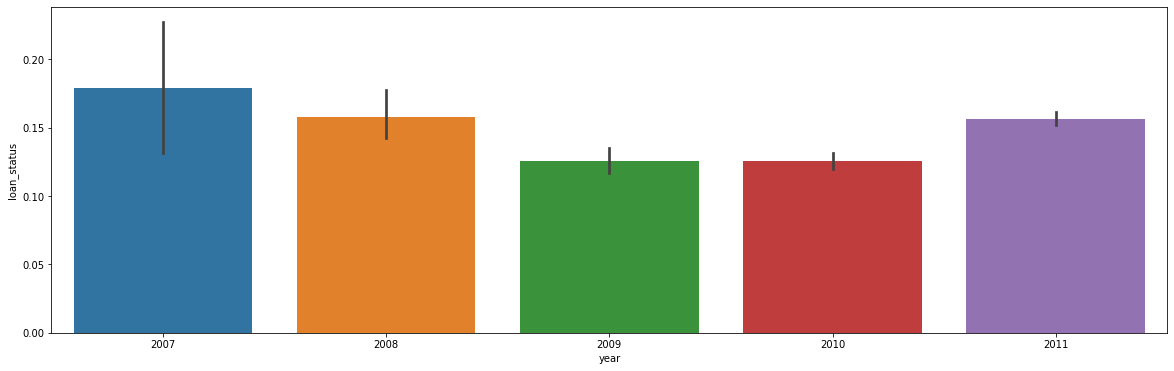

In [310]:
# observe the default rates across years
plt.figure(figsize=(20, 6))
plot_cat('year')

we can see that the number of loans has increased steadily across years. 

In [311]:
# number of loans across months
loan.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

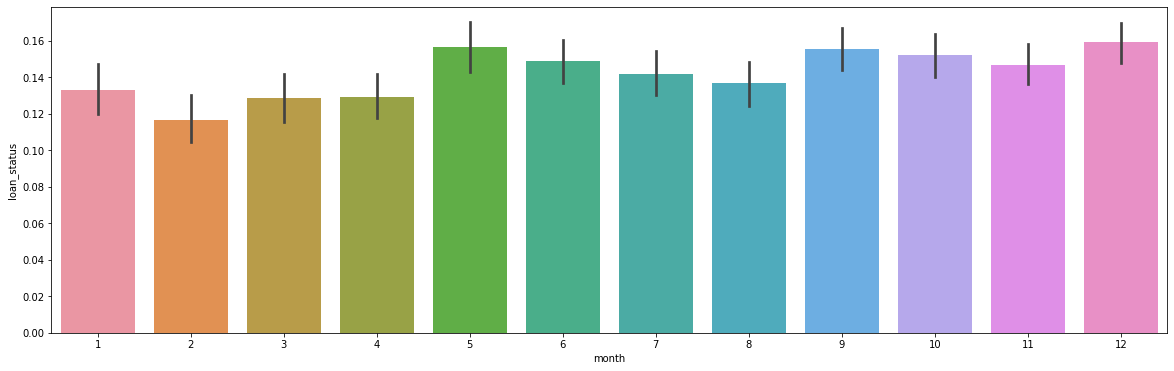

In [312]:
# lets compare the default rates across months


plot_cat('month')

Most loans are granted in December, and in general in the latter half of the year.

## Multi Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.


This will help us business understanding and default rates across the purpose of the loan.


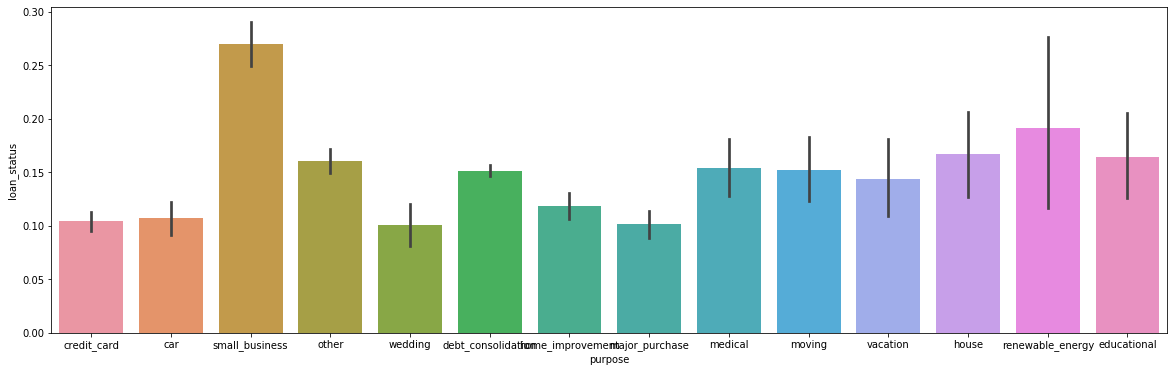

In [313]:
# purpose
plot_cat('purpose')

``observation`` :small business loans defualt the most, then renewable energy and education


we will segment the loan applications across the purpose of the loan, since it is affecting the type of applicant, interest rate, and finally the default rate. 

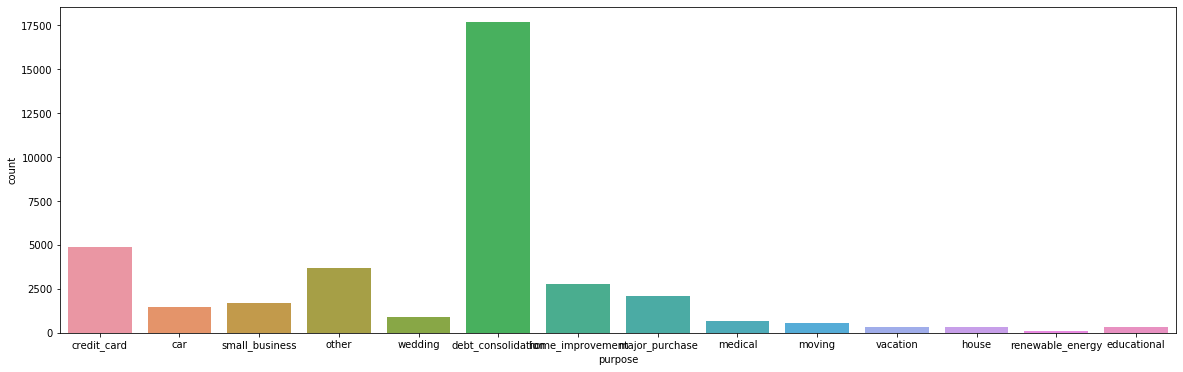

In [314]:
# the number of loans by the purpose of the loan

plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', data=loan)
plt.show()

``observation`` :the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [315]:
# observe the loan data-frame for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

In [316]:

# let's now compare the default rates across two types of categorical variables
# purpose of loan and target categorical variable

# lets write a function which takes a categorical variable and plots the default rate which is Bivaraite Analyis
# but these are segmented by purpose 

def plot_mulivariate(cat_var):
    plt.figure(figsize=(20, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan)
    plt.show()

In [317]:
# observe the loan data-frame for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

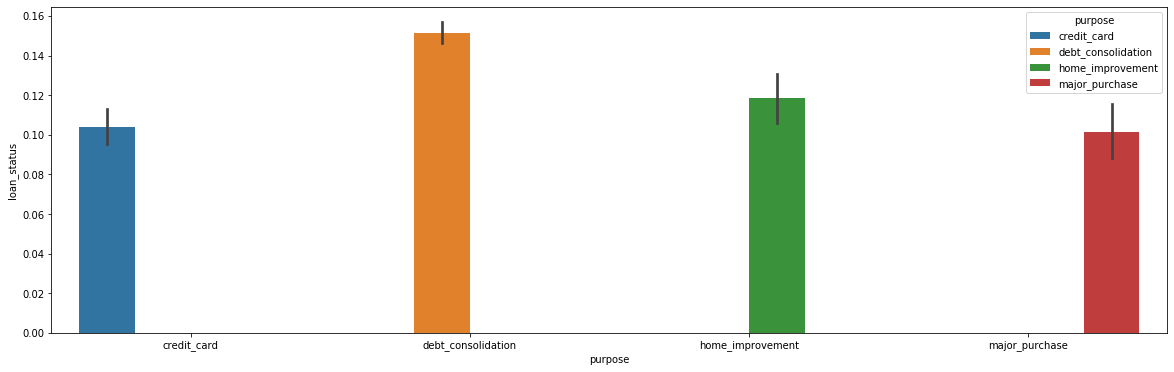

In [318]:
#plot the graph number of loans by purpose 
plot_mulivariate('purpose')

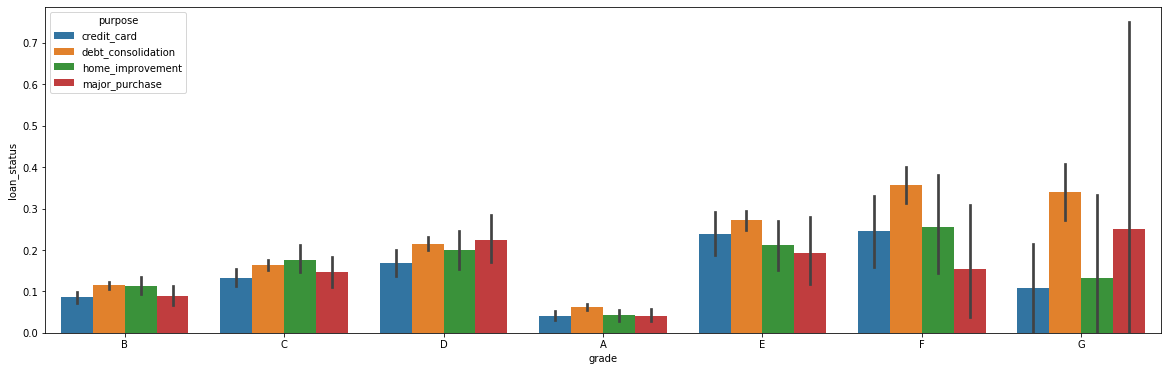

In [319]:
# grade of loan

plot_mulivariate('grade')

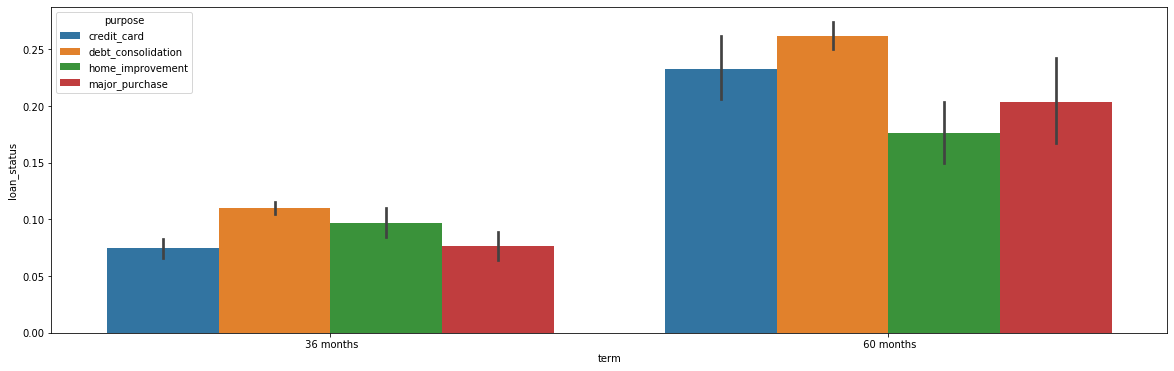

In [320]:
plot_mulivariate('term')

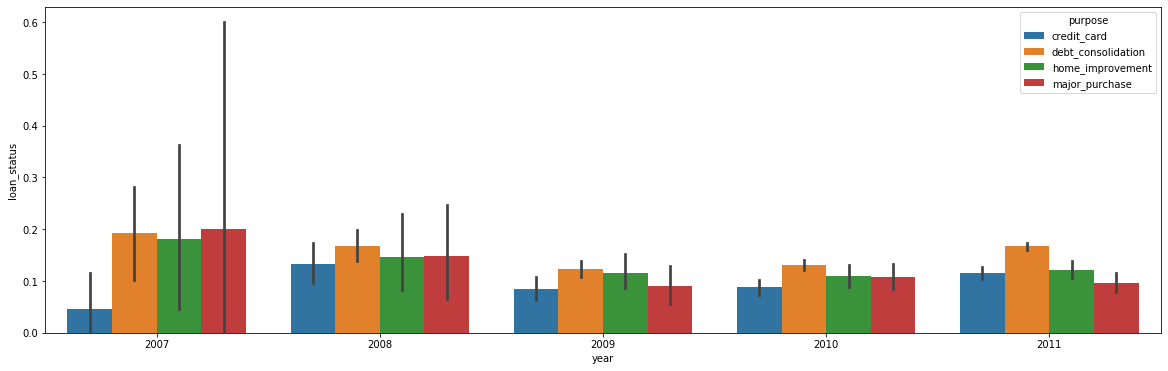

In [321]:
# year
plot_mulivariate('year')

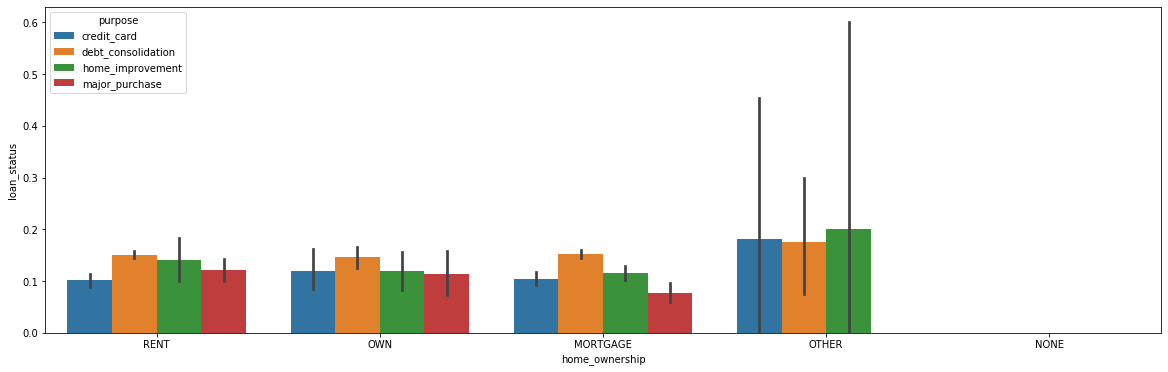

In [322]:
# home ownership
plot_mulivariate('home_ownership')

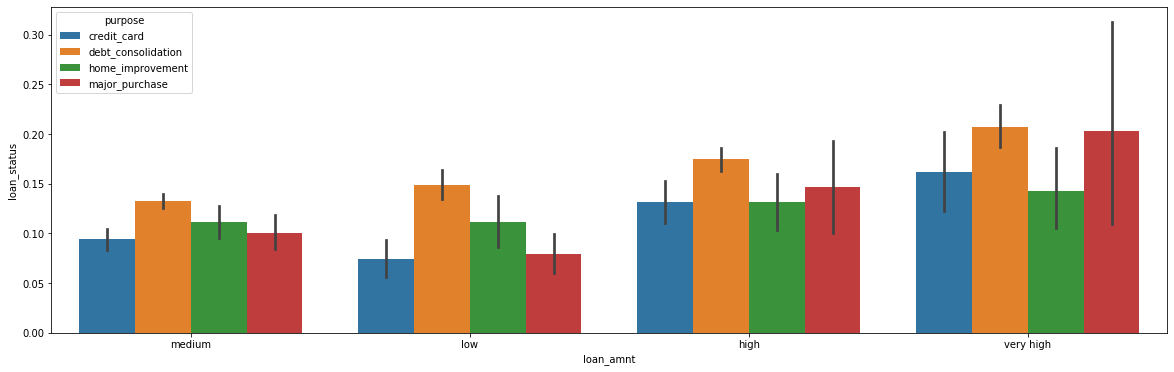

In [323]:
# loan_amnt: same trend across loan purposes

plot_mulivariate('loan_amnt')

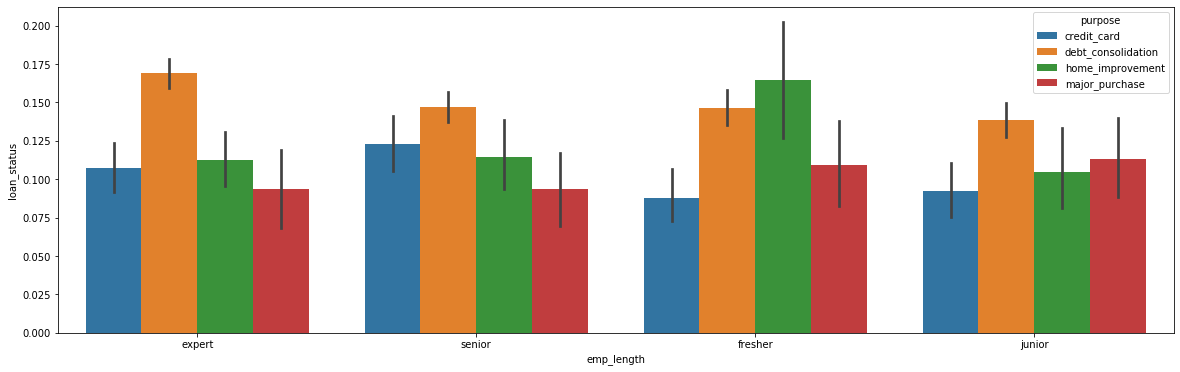

In [324]:
# Employee length or service

plot_mulivariate('emp_length')

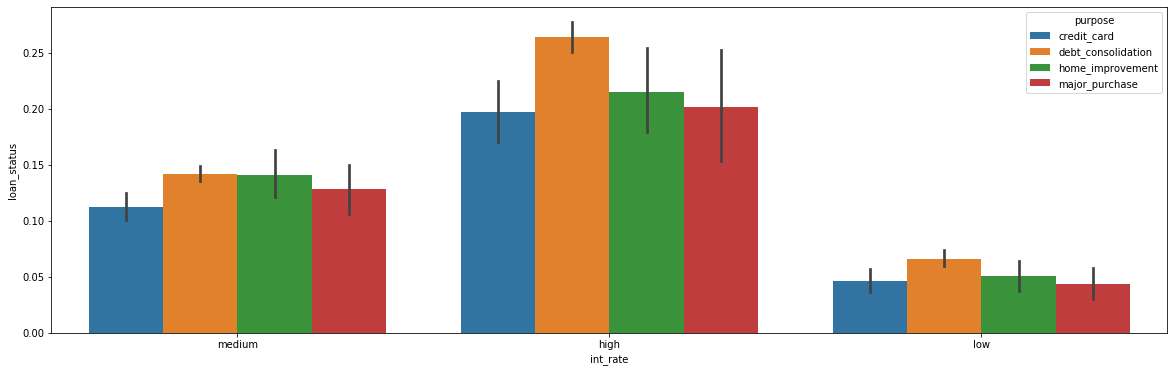

In [325]:
# interest rate

plot_mulivariate('int_rate')

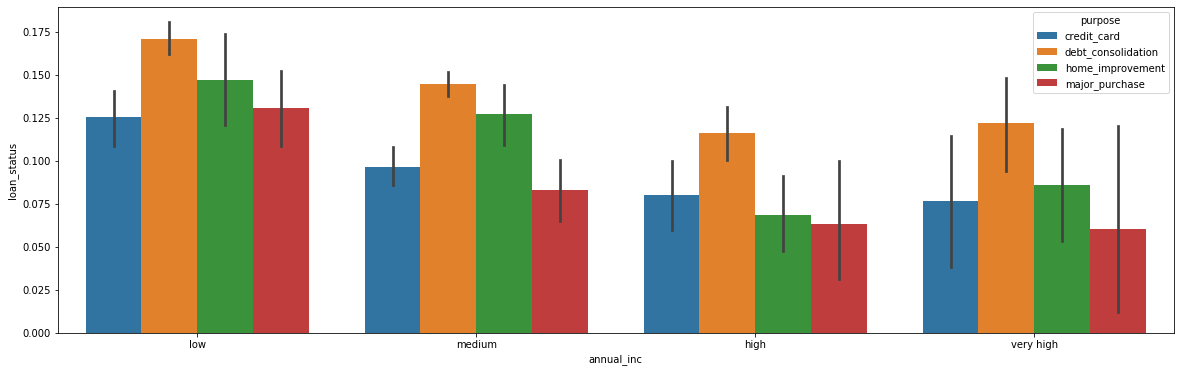

In [326]:
# annual income
plot_mulivariate('annual_inc')

In [327]:
# variation of default rate across annual_inc
loan.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)*100

annual_inc
low          15.796610
medium       13.007507
very high    10.156971
high          9.774941
Name: loan_status, dtype: float64

In [328]:
# a function which takes in a categorical variable and computed the mean(avg) default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the categories

def diff_rate(cat_var):
    default_rates = loan.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates*100) 
print(diff)

annual_inc
low          16.0
medium       13.0
very high    10.0
high         10.0
Name: loan_status, dtype: float64
0.06


We observed that there is a 6% increase in default rate as we go from high to low annual income.